In [1]:
%matplotlib inline
#
# stats on csom and perceptron
#
from os import listdir, stat
from os.path import isfile, join
import sys
import common as cmn
import numpy as np
import pandas as pd
import ggplot as gg
import matplotlib.pyplot as mp

In [3]:
def ggplt_bar(dframe):
	#lngdf = pd.melt(dframe[['ix', 'perc_error_mean']], id_vars=['ix'])
	#print lngdf
	p = gg.ggplot(gg.aes(x='ix', y='perc_error_mean'), data=dframe) + gg.geom_bar()
	
	print p

def mplt_bar(dframe):
	ax = mp.subplot()
	num = dframe.shape[0]

	ind = np.arange(num)
	bar = ax.bar(ind, dframe['perc_error_mean'], 0.35, yerr=dframe['perc_error_sd'])
	mp.show()

In [2]:
def get_files(path, maxlayer):
    filelist = [ f for f in listdir(path) \
        if f[0:5] == 'error' and isfile(join(path,f)) and\
        "C"+str(maxlayer) in f and stat(join(path,f)).st_size > 2000]
    print "files to process: " + str(len(filelist))
    return filelist

def gen_dataframe(filelist, path, colname):
   maxlayer = 3
   datalen = 50
   minlength = 100
   errorcol_name = colname
   #perc_path = "../stat_data/perceptron"
   # create dataframe for holding all combinations
   # TODO - add running length in time, running lenght in ticks
   # CSOM error?
   cols = ["ix",\
         "input",\
         "rf1",\
         "inc1",\
         "rf2",\
         "inc2",\
         "rf3",\
         "inc3",\
         "correct_mean",\
         "correct_sd"\
      ]
   combdf = pd.DataFrame(columns = cols)
   # read all stat files in directory
   
   ctr = 1
   for pfile in filelist:
      # parse filename
      finfo = cmn.parsefilename(pfile, maxlayer)
      inp = cmn.get_input_tag(pfile)
      # read using pandas into dataframe
      df = pd.read_table(join(path, pfile))
      if len(df) < minlength: 
         continue
      col = df[errorcol_name]
      tail = col.tail(datalen)
      mean = tail.mean()
      std = tail.std()
      combdf.loc[combdf.shape[0]] = [
         int(finfo['ix']),\
         finfo['input'],\
         int(finfo['C1_rf_size']),\
         int(finfo['C1_rf_inc']),\
         int(finfo['C2_rf_size']),\
         int(finfo['C2_rf_inc']),\
         int(finfo['C3_rf_size']),\
         int(finfo['C3_rf_inc']),\
         mean,\
         std\
      ]
      #print str(ctr) + "/" + str(len(percfiles)) + " done"
      ctr+=1
      #print df.shape[0]
   #combdf.to_pickle("stat_error_C3.dat")
   return combdf    

In [5]:
alphaval = 0.5

def timeplot(filelist, path, colname, n):
    errorcol_name = colname
    timecol_name = "T/1"
    begin = 0
    end = 5000
    # generate a timeplot of error curve
    #for f in filelist:
    df = pd.read_table(join (path, filelist[n]))
    mp.scatter(df[timecol_name][begin:end], df[errorcol_name][begin:end], alpha=alphaval)
    mp.show()

#from ggplot import *        
def ggscatter(filelist, path, colname, n):
    errorcol_name = colname
    timecol_name = "T/1"
    begin = 0
    end = 5000
    # generate a timeplot of error curve
    #for f in filelist:
    #n = 1
    print filelist[n]
    df = pd.read_table(join (path, filelist[n]))
    print len(df)                   
    p = gg.ggplot(gg.aes(x=timecol_name, y=errorcol_name), data=df) +\
    gg.geom_point(colour='blue', alpha=alphaval)+\
    gg.stat_smooth(colour='blue', span=10)
    #gg.geom_line() +\
    print p

In [3]:
path = "../stat_data/perceptron"
maxlayer = 3
colname = "CORRECT/1"
filelist = get_files(path, maxlayer)
# TODO add dataframe param and only process new files
df = gen_dataframe(filelist, path, colname)
print len(df)

files to process: 390
390


In [5]:
from IPython.display import display, HTML
print 'Dataframe:'
sorteddf = df.sort_values(by=['correct_mean'], ascending=False)
pd.set_option('display.max_rows', len(sorteddf))
display(sorteddf)

Dataframe:


,ix,input,rf1,inc1,rf2,inc2,rf3,inc3,correct_mean,correct_sd
157,1.0,COIL,3.0,1.0,3.0,1.0,3.0,1.0,0.4812,0.074440
158,2.0,COIL,3.0,1.0,3.0,1.0,3.0,3.0,0.4724,0.084650
162,6.0,COIL,3.0,1.0,3.0,1.0,5.0,5.0,0.4716,0.078255
161,5.0,COIL,3.0,1.0,3.0,1.0,5.0,3.0,0.4588,0.075853
160,4.0,COIL,3.0,1.0,3.0,1.0,5.0,1.0,0.4520,0.078246
165,9.0,COIL,3.0,1.0,3.0,1.0,7.0,5.0,0.4460,0.071969
184,28.0,COIL,3.0,1.0,5.0,1.0,3.0,1.0,0.4436,0.071906
159,3.0,COIL,3.0,1.0,3.0,1.0,3.0,5.0,0.4400,0.082610
164,8.0,COIL,3.0,1.0,3.0,1.0,7.0,3.0,0.4380,0.079205
328,489.0,COIL,7.0,1.0,3.0,1.0,3.0,5.0,0.4320,0.067370


In [6]:
def plotmeans(dframe):
    alphaval = 1.0
    p = gg.ggplot(gg.aes(x='ix', y='correct_mean', colour='input'), data=dframe) +\
    gg.geom_point() # + theme_grey(base_size = 18) 
    #gg.geom_line() +\
    print p

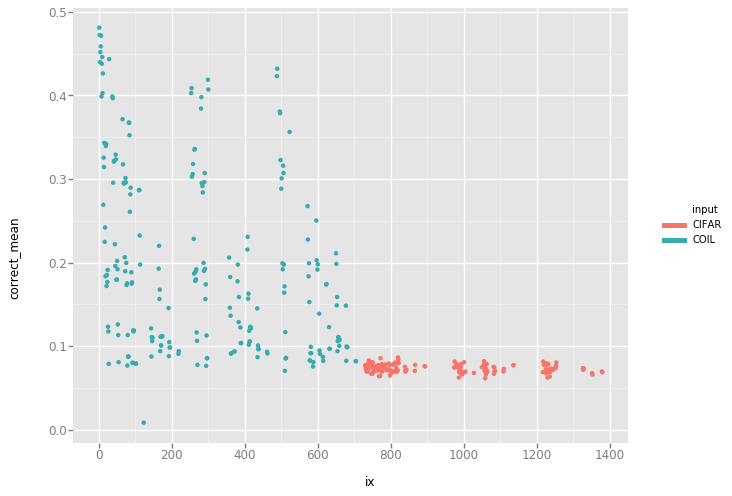

<ggplot: (277748725)>


In [7]:
plotmeans(df)

error_perc_C3_CIFAR_class_perc_train=1_C1_alpha=0.0001_C1_rf_size=7_C1_rf_inc=1_C1_som_size=4_C2_alpha=0.0001_C2_rf_size=5_C2_rf_inc=3_C2_som_size=4_C3_alpha=0.0001_C3_rf_size=3_C3_rf_inc=5_C3_som_size=4_1254-1458.out
250


/usr/local/lib/python2.7/site-packages/ggplot/stats/stat_smooth.py:77: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  smoothed_data = smoothed_data.sort('x')


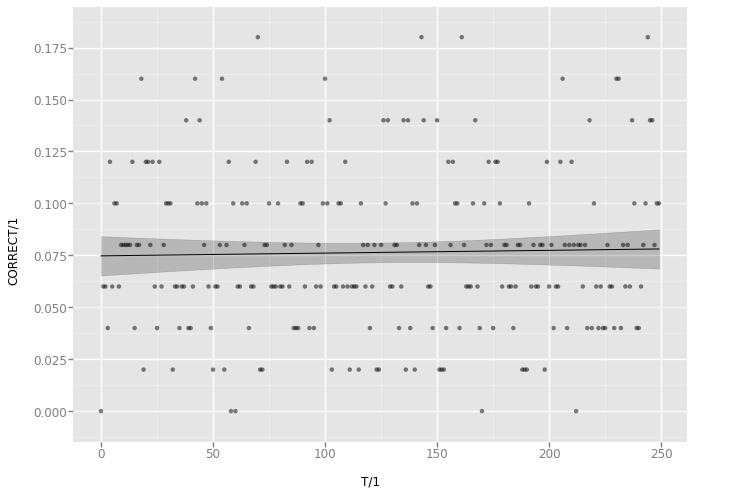

<ggplot: (290560485)>


In [8]:
ggscatter(filelist, path, colname, 140)

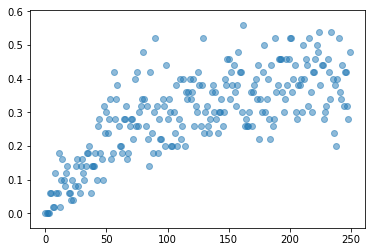

In [51]:

timeplot(filelist, path, colname,9)

In [84]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
# plot mean distros
dfsubset = df.loc[df['input']=='COIL']
print dfsubset['correct_mean'].mean()

dfsubset = df.loc[df['input']=='CIFAR']
print dfsubset['correct_mean'].mean()


In [8]:
#df.to_pickle("stat_perc_error_C3_1.dat")
df.to_csv("stat_perc_error_C3_1.csv", sep='\t')

In [25]:
    %matplotlib notebook  
    import pandas as pd
    import numpy as np
    import matplotlib as mpl
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D
    
    def scatter3dtest():
        #pd.set_option('html',False)
        pd.set_option('max_columns',30)
        pd.set_option('max_rows',10)


        # What follows is a copy of the 3D plot example code.
        # Data is randomly generated so there is no external data import.

        def randrange(n, vmin, vmax):
            return (vmax-vmin)*np.random.rand(n) + vmin

        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        n = 100
        for c, m, zl, zh in [('r', 'o', -60, -25), ('b', '^', -30, -5)]:
            xs = randrange(n, 23, 50)
            ys = randrange(n, 0, 100)
            zs = randrange(n, zl, zh)
            ax.scatter(xs, ys, zs, c=c, marker=m)
            #ax.plot_wireframe(xs, ys, zs, rstride=4, cstride=4)

        ax.set_xlabel('X Label')
        ax.set_ylabel('Y Label')
        ax.set_zlabel('Z Label')

        plt.show()
    
    def scatter3d(dframe, ax, title="", col='c'):
        # extract x, y, z vals
        # set L1 = 3, 1; inc=1
        # y = x = (3, 5, 7)
        # z = correctness
        xs = np.array(dframe['rf2'])
        ys = np.array(dframe['rf3'])
        zs = np.array(dframe['correct_mean'])
        color=col #'b' # b=blue
        marker='o'
        #fig = plt.figure()
        #ax = fig.add_subplot(subplot, projection='3d')
        ax.scatter(xs, ys, zs, c=color, marker=marker)
        #ax.plot_wireframe(xs, ys, zs, rstride=4, cstride=4)
        ax.set_xlabel('rf2')
        ax.set_ylabel('rf3')
        ax.set_zlabel('correct_mean')
        ax.set(zlim=[0,0.5]) 
        ax.set(title=title)
        #ax.axis('equal') 
        #plt.show()
        

<IPython.core.display.Javascript object>


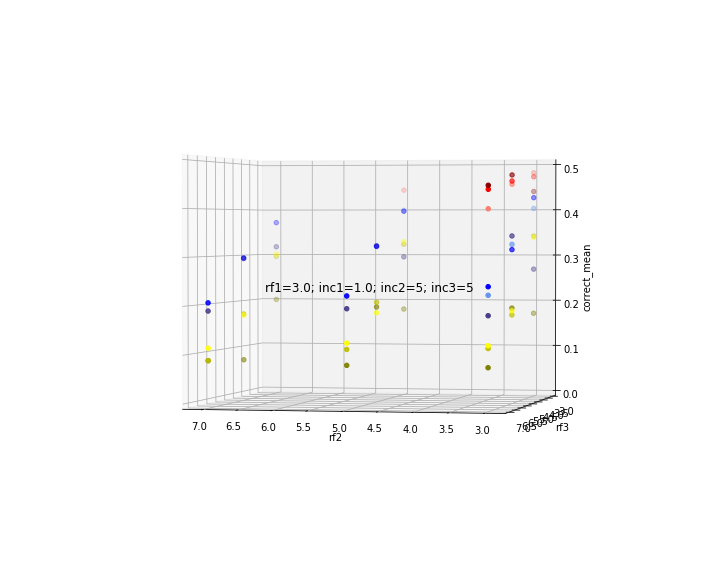

In [43]:
# lock vars 
rf1 = 3.0
inc1 = 1.0
l1_title="rf1=" + str(rf1) + "; inc1=" + str(inc1)
#
# make 3d plots 
#

#plt.subplots(nrows=1, figsize=(4, 30))
#fig = plt.figure()
fig = plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111, projection='3d')
v_inc3 = 1
for inc2, inc3, col in [(1,v_inc3, 'salmon'), (3,v_inc3, 'cornflowerblue'), (5,v_inc3, 'yellow')]:
    title = l1_title + "; inc2=" + str(inc2) + "; inc3=" + str(inc3)
    dfsubset = df.loc[(df['rf1']==rf1) & (df['inc1']==inc1)\
                 & (df['inc2']==inc2) & (df['inc3']==inc3)\
                 & (df['input']=='COIL')]

    scatter3d(dfsubset, ax, title=title, col=col)
    
v_inc3 = 3
for inc2, inc3, col in [(1,v_inc3, 'r'), (3,v_inc3, 'b'), (5,v_inc3, 'y')]:
    title = l1_title + "; inc2=" + str(inc2) + "; inc3=" + str(inc3)
    dfsubset = df.loc[(df['rf1']==rf1) & (df['inc1']==inc1)\
                 & (df['inc2']==inc2) & (df['inc3']==inc3)\
                 & (df['input']=='COIL')]

    scatter3d(dfsubset, ax, title=title, col=col)

v_inc3 = 5
for inc2, inc3, col in [(1,v_inc3, 'darkred'), (3,v_inc3, 'darkslateblue'), (5,v_inc3, 'olive')]:
    title = l1_title + "; inc2=" + str(inc2) + "; inc3=" + str(inc3)
    dfsubset = df.loc[(df['rf1']==rf1) & (df['inc1']==inc1)\
                 & (df['inc2']==inc2) & (df['inc3']==inc3)\
                 & (df['input']=='COIL')]

    scatter3d(dfsubset, ax, title=title, col=col)
    
plt.show()

    